In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [120]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [121]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

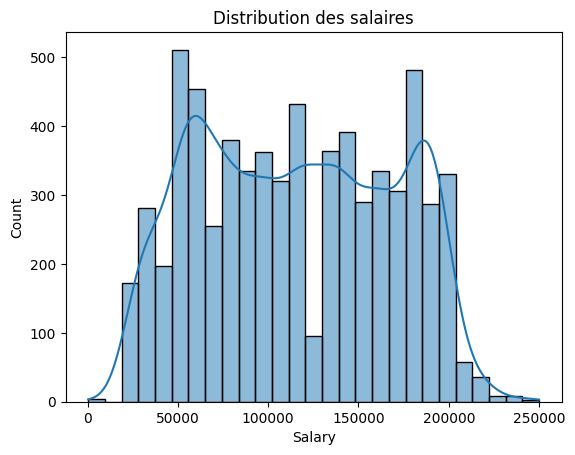

In [122]:
sns.histplot(data['Salary'], kde=True)
plt.title("Distribution des salaires")
plt.show()

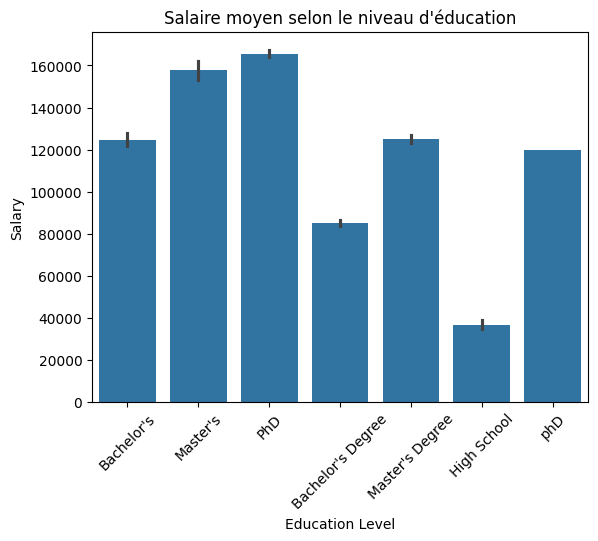

In [123]:
sns.barplot(x='Education Level', y='Salary', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Salaire moyen selon le niveau d'éducation")
plt.show()

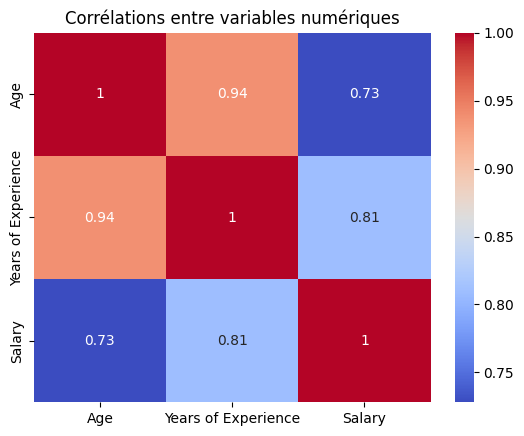

In [124]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables numériques")
plt.show()

In [125]:
model = smf.ols('Salary ~ Age + Gender + Q("Education Level") + Q("Job Title") + Q("Years of Experience")', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     258.6
Date:                Sat, 19 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:43:21   Log-Likelihood:                -74994.
No. Observations:                6698   AIC:                         1.504e+05
Df Residuals:                    6497   BIC:                         1.518e+05
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [126]:
print(model.params)

Intercept                                    19787.517328
Gender[T.Male]                                1530.977479
Gender[T.Other]                             -19367.156012
Q("Education Level")[T.Bachelor's Degree]   -51549.869013
Q("Education Level")[T.High School]         -61243.630574
                                                 ...     
Q("Job Title")[T.VP of Finance]              57596.534438
Q("Job Title")[T.VP of Operations]           47596.534438
Q("Job Title")[T.Web Developer]              43812.445237
Age                                           1045.719434
Q("Years of Experience")                      4043.696663
Length: 203, dtype: float64


In [127]:
print(model.pvalues)

Intercept                                     2.743698e-01
Gender[T.Male]                                2.826533e-03
Gender[T.Other]                               1.428653e-04
Q("Education Level")[T.Bachelor's Degree]     0.000000e+00
Q("Education Level")[T.High School]          2.980871e-187
                                                 ...      
Q("Job Title")[T.VP of Finance]               2.328727e-02
Q("Job Title")[T.VP of Operations]            6.080469e-02
Q("Job Title")[T.Web Developer]               1.518237e-02
Age                                           2.950476e-25
Q("Years of Experience")                     1.056334e-215
Length: 203, dtype: float64


In [128]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

R-squared: 0.8883940189394963
Adjusted R-squared: 0.884958403084163


In [129]:
data["residuals"] = model.resid
data["predicted"] = model.fittedvalues

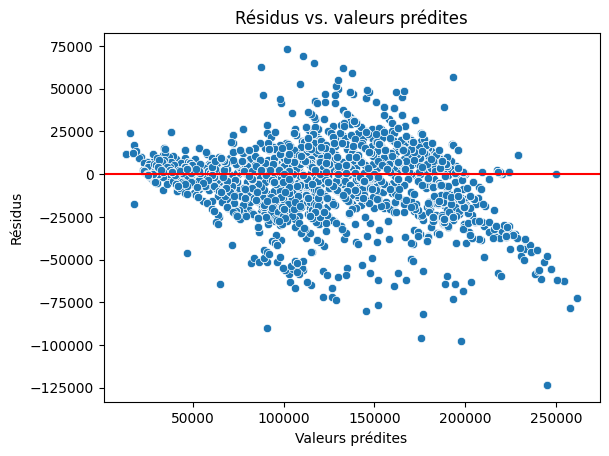

In [130]:
sns.scatterplot(x=data["predicted"], y=data["residuals"])
plt.axhline(0, color='red')
plt.title("Résidus vs. valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

In [131]:
new_data = pd.DataFrame({
    'Age': [32],
    'Gender': ['Male'],
    'Education Level': ["Bachelor's"],
    'Job Title': ['Software Engineer'],
    'Years of Experience': [5]
})

predicted_salary = model.predict(new_data)
print(predicted_salary)

0    147782.295088
dtype: float64


<Axes: xlabel='Years of Experience', ylabel='Salary'>

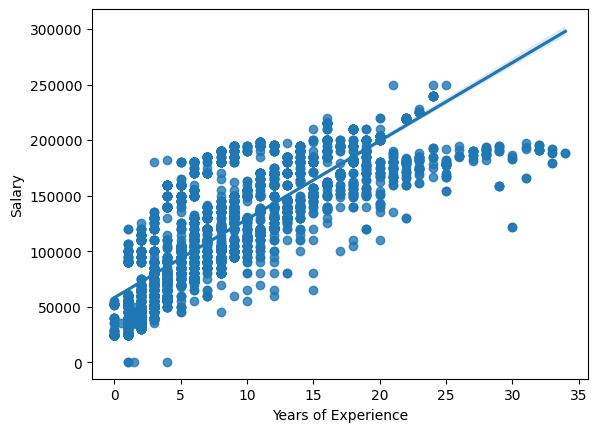

In [132]:
sns.regplot(x='Years of Experience', y='Salary', data=data)

<Axes: xlabel='Age', ylabel='Salary'>

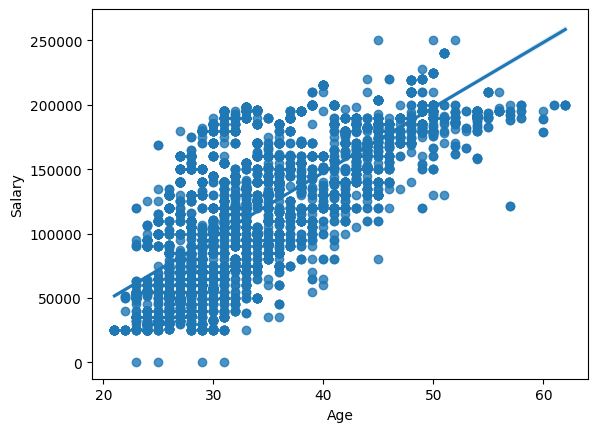

In [133]:
sns.regplot(x='Age', y='Salary', data=data)

In [134]:
model2 = smf.glm('Salary ~ Age + Gender + Q("Education Level") + Q("Job Title") + Q("Years of Experience")', data=data).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Salary   No. Observations:                 6698
Model:                            GLM   Df Residuals:                     6497
Model Family:                Gaussian   Df Model:                          200
Link Function:               Identity   Scale:                      3.2059e+08
Method:                          IRLS   Log-Likelihood:                -74994.
Date:                Sat, 19 Jul 2025   Deviance:                   2.0829e+12
Time:                        16:43:23   Pearson chi2:                 2.08e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [135]:
new_data2 = pd.DataFrame({
    'Age': [32],
    'Gender': ['Male'],
    'Education Level': ["Bachelor's"],
    'Job Title': ['Software Engineer'],
    'Years of Experience': [5]
})

predicted_salary2 = model2.predict(new_data2)
print(predicted_salary2)

0    147782.295088
dtype: float64
